# U.S. Medical Insurance Costs

In [73]:
import csv

In [74]:
# Transfer file contents to this workspace
with open('insurance.csv') as ins_file:
    file = csv.DictReader(ins_file)
    # Create a list of every entry for later use
    database = []
    for row in file:
        database.append(row)
        print(row)

{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}
{'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}
{'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}
{'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}
{'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552'}
{'age': '31', 'sex': 'female', 'bmi': '25.74', 'children': '0', 'smoker': 'no', 'region': 'southeast', 'charges': '3756.6216'}
{'age': '46', 'sex': 'female', 'bmi': '33.44', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '8240.5896'}
{'age': '37', 'sex': 'female', 'bmi': '27.74', 'children': '3', 'smoker': 'no', 'region': 'northwest', 'charges': '7281.

###### There are 1,338 records!

No entries in the file have unique identifiers (name, ID...), so I will analyse the dataset as a whole. I could group the frequencies of each value or have frequencies of matching records (e.g. same age AND smoking status). The fields we have are:

 - Age
 - Sex
 - BMI
 - Children
 - Smoker
 - Region
 - Charges

In [75]:
# I want a sorted dictionary for numbered variables, so I need to know the keys
def get_keys(var):
    values = []
    for entry in database:
        if entry[var] not in values:
            values.append(entry[var])
    # I could return sorted(values), but let's instead create a skeleton dictionary
    skeleton = {}
    for i in sorted(values):
        skeleton[i] = 0
    return skeleton
get_keys('age')

{'18': 0,
 '19': 0,
 '20': 0,
 '21': 0,
 '22': 0,
 '23': 0,
 '24': 0,
 '25': 0,
 '26': 0,
 '27': 0,
 '28': 0,
 '29': 0,
 '30': 0,
 '31': 0,
 '32': 0,
 '33': 0,
 '34': 0,
 '35': 0,
 '36': 0,
 '37': 0,
 '38': 0,
 '39': 0,
 '40': 0,
 '41': 0,
 '42': 0,
 '43': 0,
 '44': 0,
 '45': 0,
 '46': 0,
 '47': 0,
 '48': 0,
 '49': 0,
 '50': 0,
 '51': 0,
 '52': 0,
 '53': 0,
 '54': 0,
 '55': 0,
 '56': 0,
 '57': 0,
 '58': 0,
 '59': 0,
 '60': 0,
 '61': 0,
 '62': 0,
 '63': 0,
 '64': 0}

It makes sense to have the next function use the above function that got the keys for whatever is passed as the variable below.

In [76]:
def single_var(var):
    frequencies = get_keys(var)
    for entry in database:
        frequencies[entry[var]] += 1
    return frequencies

age_freq = single_var('age')
sex_freq = single_var('sex')
bmi_freq = single_var('bmi')
children_freq = single_var('children')
smoker_freq = single_var('smoker')
region_freq = single_var('region')
charges_freq = single_var('charges')

#### We now have a general view of our dataset! Time to see who's part of this.

In [77]:
print(sex_freq)

{'female': 662, 'male': 676}


There seems to be a good ratio of female to male humans in this database.

In [78]:
print(age_freq)

{'18': 69, '19': 68, '20': 29, '21': 28, '22': 28, '23': 28, '24': 28, '25': 28, '26': 28, '27': 28, '28': 28, '29': 27, '30': 27, '31': 27, '32': 26, '33': 26, '34': 26, '35': 25, '36': 25, '37': 25, '38': 25, '39': 25, '40': 27, '41': 27, '42': 27, '43': 27, '44': 27, '45': 29, '46': 29, '47': 29, '48': 29, '49': 28, '50': 29, '51': 29, '52': 29, '53': 28, '54': 28, '55': 26, '56': 26, '57': 26, '58': 25, '59': 25, '60': 23, '61': 23, '62': 23, '63': 23, '64': 22}


In [79]:
print(bmi_freq)

{'15.96': 1, '16.815': 2, '17.195': 1, '17.29': 3, '17.385': 1, '17.4': 1, '17.48': 1, '17.67': 1, '17.765': 1, '17.8': 1, '17.86': 1, '17.955': 1, '18.05': 1, '18.3': 1, '18.335': 3, '18.5': 1, '18.6': 1, '18.715': 1, '18.905': 1, '19': 1, '19.095': 1, '19.19': 1, '19.3': 1, '19.475': 1, '19.57': 1, '19.8': 3, '19.855': 2, '19.95': 6, '20.045': 2, '20.1': 1, '20.13': 1, '20.235': 4, '20.3': 1, '20.35': 1, '20.4': 1, '20.425': 1, '20.52': 2, '20.6': 2, '20.615': 1, '20.7': 1, '20.79': 1, '20.8': 2, '20.9': 2, '21.01': 1, '21.09': 1, '21.12': 1, '21.28': 1, '21.3': 1, '21.375': 2, '21.4': 2, '21.47': 3, '21.5': 1, '21.56': 1, '21.565': 1, '21.66': 3, '21.7': 1, '21.755': 4, '21.78': 2, '21.8': 1, '21.85': 4, '21.89': 1, '21.945': 1, '22': 1, '22.04': 1, '22.1': 1, '22.135': 4, '22.22': 1, '22.23': 2, '22.3': 2, '22.42': 3, '22.515': 5, '22.6': 2, '22.61': 4, '22.705': 3, '22.77': 1, '22.8': 2, '22.88': 1, '22.895': 4, '22.99': 3, '23': 1, '23.085': 2, '23.1': 1, '23.18': 5, '23.2': 1, '

In [80]:
print(charges_freq)

{'10043.249': 1, '10065.413': 1, '10072.05505': 1, '10085.846': 1, '10096.97': 1, '10106.13425': 1, '10107.2206': 1, '10115.00885': 1, '10118.424': 1, '10141.1362': 1, '10156.7832': 1, '10197.7722': 1, '10214.636': 1, '10226.2842': 1, '10231.4999': 1, '10264.4421': 1, '10269.46': 1, '10325.206': 1, '10338.9316': 1, '10355.641': 1, '10370.91255': 1, '10381.4787': 1, '10407.08585': 1, '10422.91665': 1, '10435.06525': 1, '10436.096': 1, '10450.552': 1, '10461.9794': 1, '10493.9458': 1, '10560.4917': 1, '10564.8845': 1, '10577.087': 1, '10579.711': 1, '10594.2257': 1, '10594.50155': 1, '10600.5483': 1, '10601.412': 1, '10601.63225': 1, '10602.385': 1, '10702.6424': 1, '10704.47': 1, '10713.644': 1, '10736.87075': 1, '10791.96': 1, '10795.93733': 1, '10796.35025': 1, '10797.3362': 1, '10806.839': 1, '10807.4863': 1, '10825.2537': 1, '10848.1343': 1, '10923.9332': 1, '10928.849': 1, '10942.13205': 1, '10959.33': 1, '10959.6947': 1, '10965.446': 1, '10976.24575': 1, '10977.2063': 1, '10982.50

It's tough to tell what's going on behind this wall of values for ages and BMI.

In [81]:
print(children_freq)

{'0': 574, '1': 324, '2': 240, '3': 157, '4': 25, '5': 18}


As one expects, it is rarer to have more children.

In [82]:
print(smoker_freq)

{'no': 1064, 'yes': 274}


There are about 4 times as many non-smokers than those who do smoke.

In [83]:
print(region_freq)

{'northeast': 324, 'northwest': 325, 'southeast': 364, 'southwest': 325}


People in the Southeast tend to pay more. But is that down to the people who live there or is the insurance cost putting them at a disadvantage?

##### Charts exist for frequency visualisation! Let's have a look!

In [84]:
from matplotlib import pyplot as plt

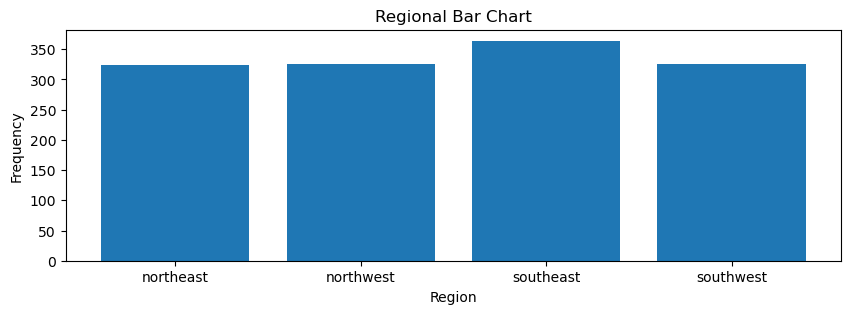

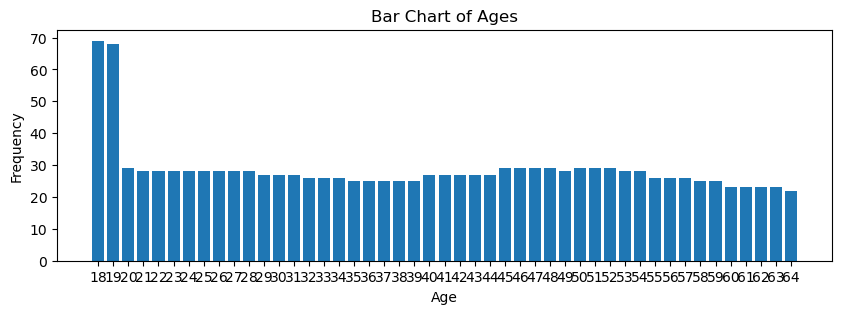

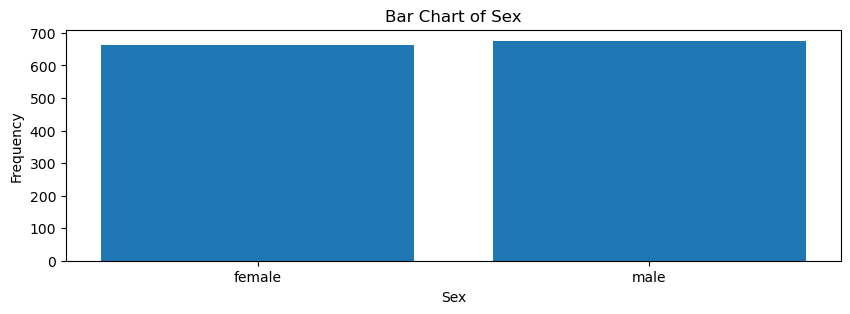

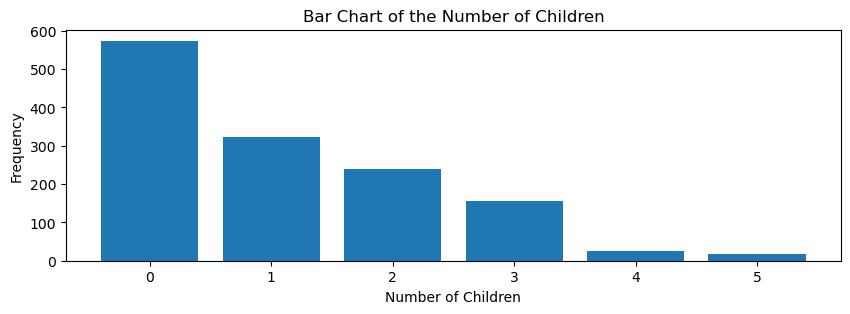

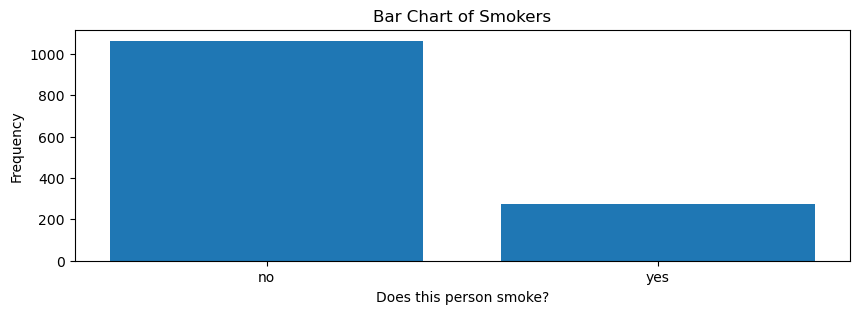

In [85]:
# Function to get a formatted bar chart
def get_bar(bar_var, name, x, y):
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.bar(list(bar_var.keys()), list(bar_var.values()))
    ax.set(title=name, xlabel=x, ylabel=y)
    
    plt.show()

get_bar(region_freq, 'Regional Bar Chart', 'Region', 'Frequency')
get_bar(age_freq, 'Bar Chart of Ages', 'Age', 'Frequency')
get_bar(sex_freq, 'Bar Chart of Sex', 'Sex', 'Frequency')
get_bar(children_freq, 'Bar Chart of the Number of Children', 'Number of Children', 'Frequency')
get_bar(smoker_freq, 'Bar Chart of Smokers', 'Does this person smoke?', 'Frequency')

We now notice the large proportion of people aged 18 or 19 in the bar chart for ages.

The dictionaries of frequencies are only useful for bar charts. We should define another function to get a list of every entry for a given variable. 

In [86]:
# Generate a function that can sometimes round every value, before adding them to a list
# Set default rounding figures to the precision in the original database
def get_lists(round_bmi=3, round_charges=5, round_age=0):
    data_dict = {'age': [], 'sex': [], 'bmi': [], 'children': [],
                 'smoker': [], 'region': [], 'charges': []}

    for entry in database:
        data_dict['age'].append(round(float(entry['age']), round_age))
        data_dict['sex'].append(entry['sex'])
        data_dict['bmi'].append(round(float(entry['bmi']), round_bmi))
        data_dict['children'].append(entry['children'])
        data_dict['smoker'].append(entry['smoker'])
        data_dict['region'].append(entry['region'])
        data_dict['charges'].append(round(float(entry['charges']), round_charges))

    return data_dict

# I want to round bmi and charges
data_dict = get_lists(1, -1)
print(data_dict)

{'age': [19.0, 18.0, 28.0, 33.0, 32.0, 31.0, 46.0, 37.0, 37.0, 60.0, 25.0, 62.0, 23.0, 56.0, 27.0, 19.0, 52.0, 23.0, 56.0, 30.0, 60.0, 30.0, 18.0, 34.0, 37.0, 59.0, 63.0, 55.0, 23.0, 31.0, 22.0, 18.0, 19.0, 63.0, 28.0, 19.0, 62.0, 26.0, 35.0, 60.0, 24.0, 31.0, 41.0, 37.0, 38.0, 55.0, 18.0, 28.0, 60.0, 36.0, 18.0, 21.0, 48.0, 36.0, 40.0, 58.0, 58.0, 18.0, 53.0, 34.0, 43.0, 25.0, 64.0, 28.0, 20.0, 19.0, 61.0, 40.0, 40.0, 28.0, 27.0, 31.0, 53.0, 58.0, 44.0, 57.0, 29.0, 21.0, 22.0, 41.0, 31.0, 45.0, 22.0, 48.0, 37.0, 45.0, 57.0, 56.0, 46.0, 55.0, 21.0, 53.0, 59.0, 35.0, 64.0, 28.0, 54.0, 55.0, 56.0, 38.0, 41.0, 30.0, 18.0, 61.0, 34.0, 20.0, 19.0, 26.0, 29.0, 63.0, 54.0, 55.0, 37.0, 21.0, 52.0, 60.0, 58.0, 29.0, 49.0, 37.0, 44.0, 18.0, 20.0, 44.0, 47.0, 26.0, 19.0, 52.0, 32.0, 38.0, 59.0, 61.0, 53.0, 19.0, 20.0, 22.0, 19.0, 22.0, 54.0, 22.0, 34.0, 26.0, 34.0, 29.0, 30.0, 29.0, 46.0, 51.0, 53.0, 19.0, 35.0, 48.0, 32.0, 42.0, 40.0, 44.0, 48.0, 18.0, 30.0, 50.0, 42.0, 18.0, 54.0, 32.0, 37.0, 4

database is a list of dictionaries. data_dict is a dictionary of lists. I did not need to make data_dict, but I chose to.

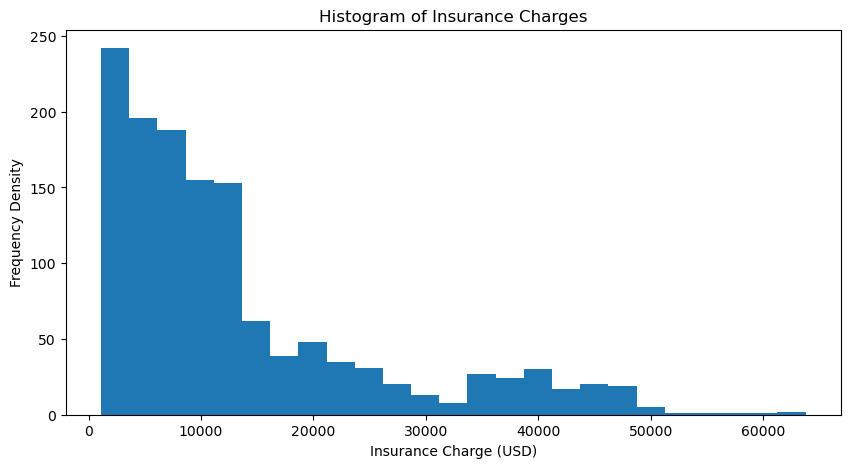

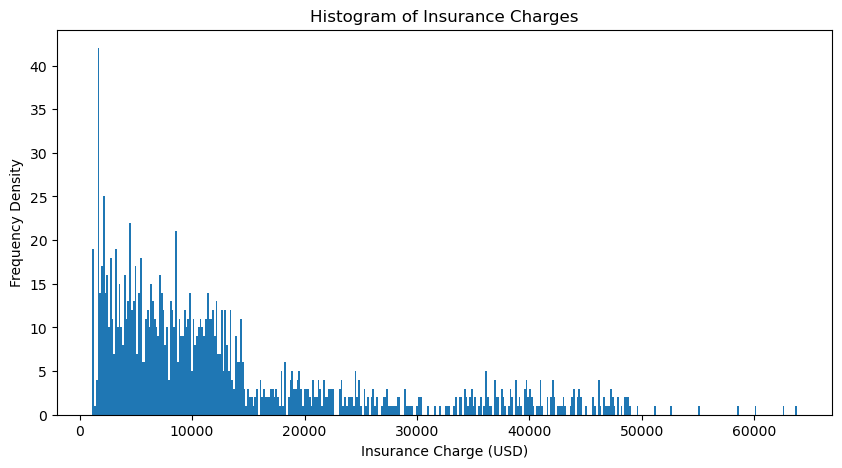

In [87]:
def get_hist(var, bins, name, x, xscale='linear'):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.hist(data_dict[var], bins = bins)
    ax.set(title=name, xlabel=x, ylabel='Frequency Density')
    plt.xscale(xscale)
    plt.show()

get_hist('charges', 25, 'Histogram of Insurance Charges', 'Insurance Charge (USD)')
get_hist('charges', 400, 'Histogram of Insurance Charges', 'Insurance Charge (USD)')

In [88]:
print(min(data_dict['charges']), max(data_dict['charges']))

1120.0 63770.0


The lowest insurance charge is \\$1,120. Most people have insurance charges less than \\$15,000. Most of the people with charges greater than that have to pay less than \\$50,000, but there are some anomalous results past that, extending to \\$63,770.

In [89]:
# I want to see if any ages are not in the database
for age in range(100):
    if age not in data_dict['age']:
        print(age)
        
print(min(data_dict['age']), max(data_dict['age']))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
18.0 64.0


An important note is that the age range of the people in the database is limited to people older than 17 and younger than 65. Between those ages, every age is accounted for.

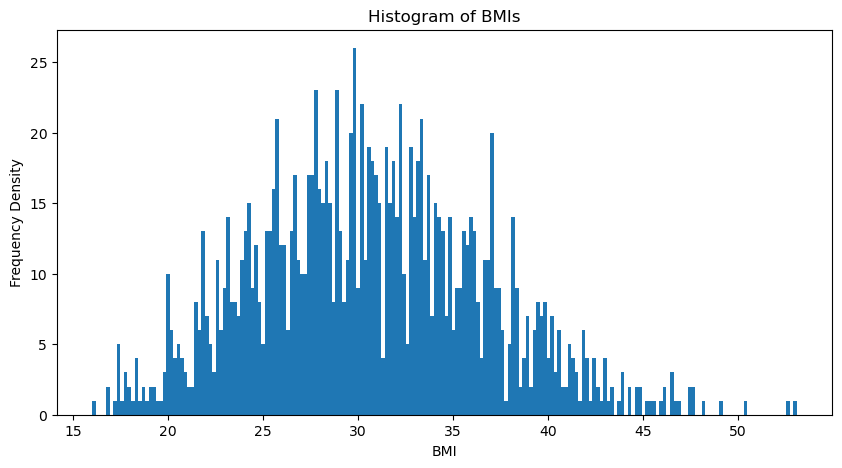

In [90]:
get_hist('bmi', 200, 'Histogram of BMIs', 'BMI')

This looks like a normal distribution, which is expected.

## Wider Criteria

Next, I want to get frequencies of people who match 2 criteria (e.g. male smokers, ages with children).

Can I modify single_var to generate a two_var function?

In [91]:
def two_var(var1, var2, success):
    condition_met = []
    condition_not_met = []
    for entry in database:
        if entry[var1]==success:
            condition_met.append(entry[var2])
        else:
            condition_not_met.append(entry[var2])

    # Get frequencies of each value
    count_met = [] # Index values are the same for frequency and the value in condition
    count_not_met = [] # so count_met and condition_met match up
    unique_met = []
    unique_not_met = []
    
    met_condition = condition_met.copy()
    while len(met_condition)>0:
        value = met_condition[0]
        unique_met.append(float(value)) # Every value in the returned list is unique
        count = met_condition.count(value)
        count_met.append(count)
        for i in range(count):
            met_condition.remove(value)
    # Do that again for  condition_not_met!
    not_met_condition = condition_not_met.copy()
    while len(not_met_condition)>0:
        value = not_met_condition[0]
        unique_not_met.append(float(value)) # Every value in the returned list is unique
        count = not_met_condition.count(value)
        count_not_met.append(count)
        for i in range(count):
            not_met_condition.remove(value)
            
    return unique_met, count_met, unique_not_met, count_not_met

In [92]:
met, count_met, not_met, count_not_met = two_var('smoker', 'age', 'yes')
print(met, count_met)
print(not_met, count_not_met)

[19.0, 62.0, 27.0, 30.0, 34.0, 31.0, 22.0, 28.0, 35.0, 60.0, 36.0, 48.0, 58.0, 18.0, 53.0, 20.0, 37.0, 45.0, 57.0, 59.0, 64.0, 56.0, 38.0, 61.0, 63.0, 29.0, 44.0, 32.0, 46.0, 42.0, 40.0, 23.0, 54.0, 50.0, 52.0, 25.0, 47.0, 43.0, 26.0, 39.0, 24.0, 55.0, 33.0, 21.0, 51.0, 49.0, 41.0] [18, 4, 9, 9, 5, 5, 6, 3, 5, 5, 6, 5, 1, 12, 5, 9, 9, 5, 4, 4, 7, 4, 2, 6, 5, 6, 6, 5, 5, 8, 5, 7, 5, 4, 6, 5, 10, 12, 3, 6, 6, 2, 6, 2, 6, 4, 2]
[18.0, 28.0, 33.0, 32.0, 31.0, 46.0, 37.0, 60.0, 25.0, 23.0, 56.0, 19.0, 52.0, 30.0, 59.0, 63.0, 55.0, 62.0, 26.0, 24.0, 41.0, 38.0, 21.0, 40.0, 58.0, 34.0, 43.0, 64.0, 61.0, 53.0, 44.0, 57.0, 29.0, 22.0, 45.0, 48.0, 35.0, 54.0, 49.0, 20.0, 47.0, 51.0, 50.0, 27.0, 36.0, 39.0, 42.0] [57, 25, 20, 21, 22, 24, 16, 18, 23, 21, 22, 50, 23, 18, 21, 18, 24, 19, 25, 22, 25, 23, 26, 22, 24, 21, 15, 15, 17, 23, 21, 22, 21, 22, 24, 24, 20, 23, 24, 20, 19, 23, 25, 19, 19, 19, 19]


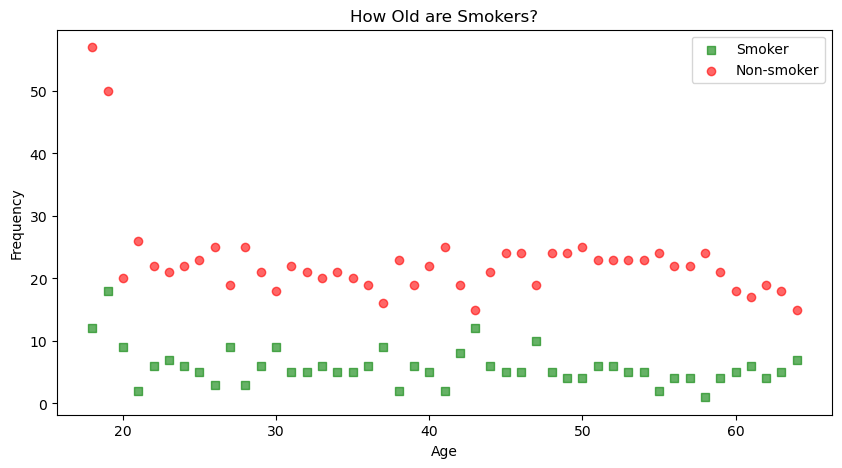

In [93]:
# This block is only useful for plots with frequency on the y-axis and 2 series

def get_scatter(var1, var2, success, name, x, l1, l2, c1, c2):
    met, count_met, not_met, count_not_met = two_var(var1, var2, success,)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(met, count_met, c=c1, marker=',', label = l1, alpha=0.6)
    ax.scatter(not_met, count_not_met, c=c2, marker='o', label = l2, alpha=0.6)
    ax.set(title=name, xlabel=x, ylabel='Frequency')
    ax.legend()
    plt.show()
    
get_scatter('smoker', 'age', 'yes', 'How Old are Smokers?',
            'Age', 'Smoker', 'Non-smoker', 'g', 'r')

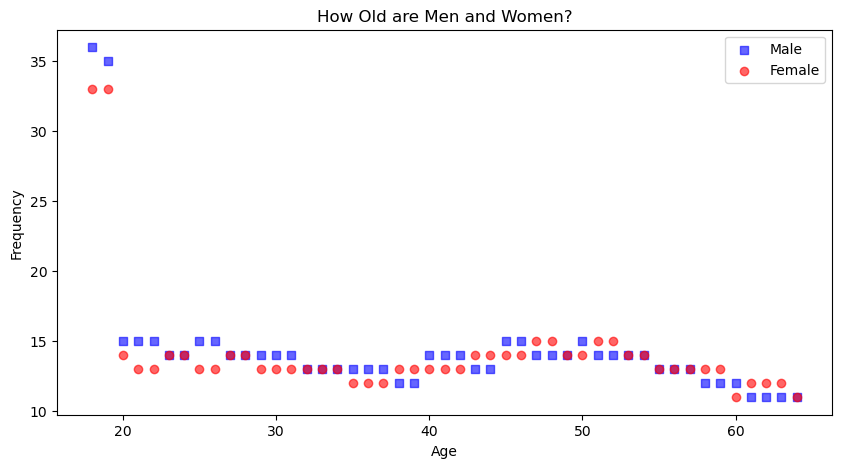

In [94]:
get_scatter('sex', 'age', 'male', 'How Old are Men and Women?',
            'Age', 'Male', 'Female', 'b', 'r')

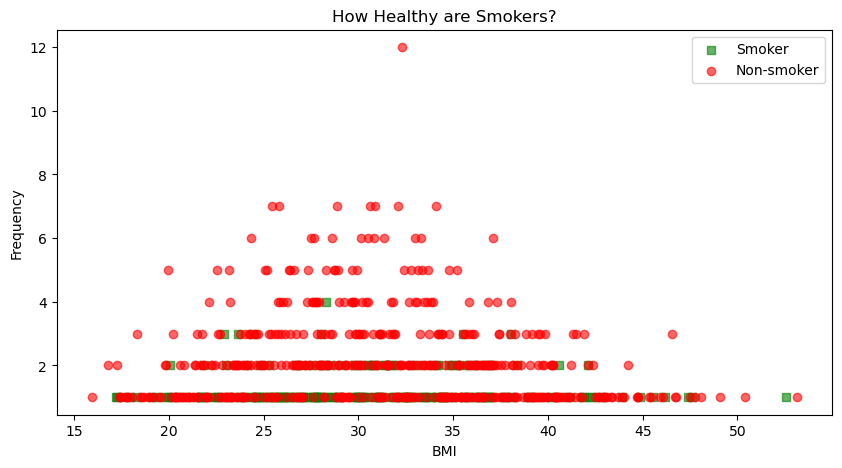

In [95]:
get_scatter('smoker', 'bmi', 'yes', 'How Healthy are Smokers?',
            'BMI', 'Smoker', 'Non-smoker', 'g', 'r')

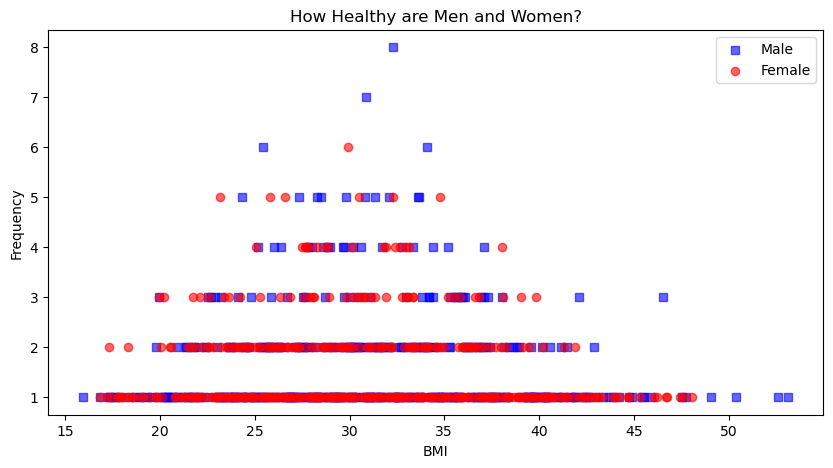

In [96]:
get_scatter('sex', 'bmi', 'male', 'How Healthy are Men and Women?',
            'BMI', 'Male', 'Female', 'b', 'r')

BMI frequency charts look to be normally distributed, as one should expect. We have now seen that the dataset is generally mixed well across properties of each person, but has a high number of 18 and 19 year olds. Now that we understand the people within the database, we can analyse properties relative to each other.

## Beyond Frequency

For more interesting information, I will need to preserve the individual entries and look further than just the frequencies. I want to get a scatter chart of charges against age, with a legend for sex, for example. This legend can be changed to have a look at more types of people and other findings from changing the axes.

In [97]:
# Redefine our data dictionary. I do not want to round any values.
data_dict = get_lists()
# I want to get lists ready for easier analysis
age_list = data_dict['age']
sex_list = data_dict['sex']
bmi_list = data_dict['bmi']
children_list = data_dict['children']
smoker_list = data_dict['smoker']
region_list = data_dict['region']
charges_list = data_dict['charges']

I can't use the get_scatter function from above to plot this more interesting data. I will not make another function. I want to modify the analysis as I go along.

In [98]:
# These need to be separated into groups first, then I can get 4 plots separated by region
# Region = [age, bmi, charges, sex, children, smoker, float_children]
ne = [[], [], [], [[],[]], [[],[]], [[],[]], []]
nw = [[], [], [], [[],[]], [[],[]], [[],[]], []]
se = [[], [], [], [[],[]], [[],[]], [[],[]], []]
sw = [[], [], [], [[],[]], [[],[]], [[],[]], []]
for i in range(len(region_list)):
    if region_list[i]=='northeast': region = ne
    elif region_list[i]=='northwest': region = nw
    elif region_list[i]=='southeast': region = se
    else: region = sw
    region[0].append(age_list[i])
    region[1].append(bmi_list[i])
    region[2].append(charges_list[i])
    # Sex
    if sex_list[i] == 'male': # It is best to set the colours for categorical variables here
        region[3][0].append('b')
        region[3][1].append('Male')
    else:
        region[3][0].append('r')
        region[3][1].append('Female')
    # Number of children
    # I could have used a function instead of repeating blocks of code that look like this 
    if children_list[i] =='0':
        region[4][0].append('lavenderblush')
        region[4][1].append('0 Children')
        region[6].append(0)
    elif children_list[i] =='1':
        region[4][0].append('thistle')
        region[4][1].append('1 Child')
        region[6].append(1)
    elif children_list[i] =='2':
        region[4][0].append('mediumpurple')
        region[4][1].append('2 Children')
        region[6].append(2)
    elif children_list[i] =='3':
        region[4][0].append('blueviolet')
        region[4][1].append('3 Children')
        region[6].append(3)
    elif children_list[i] =='4':
        region[4][0].append('mediumblue')
        region[4][1].append('4 Children')
        region[6].append(4)
    elif children_list[i] =='5': # elif because there may be parents of > 5 children in the future
        region[4][0].append('darkblue')
        region[4][1].append('5 Children')
        region[6].append(5)
    # Smoking status
    if smoker_list[i] == 'yes':
        region[5][0].append('orange')
        region[5][1].append('Smoker')
    else:
        region[5][0].append('lawngreen')
        region[5][1].append('Non-Smoker')
regions = [nw, ne, sw, se]
region_dict = {'age': 0, 'bmi': 1, 'charges': 2, 'sex': 3, 'children': 4, 'smoker': 5}
# Also do this for sex, children and smoker - those are categorical variables too!
# Sex = [age, bmi, charges, region, children, smoker, float_children]
men = [[], [], [], [[],[]], [[],[]], [[],[]], []]
women = [[], [], [], [[],[]], [[],[]], [[],[]], []]
for i in range(len(sex_list)):
    if sex_list[i]=='male': sex = men
    else: sex = women
    sex[0].append(age_list[i])
    sex[1].append(bmi_list[i])
    sex[2].append(charges_list[i])
    # Region
    if region_list[i] == 'northwest':
        sex[3][0].append('b')
        sex[3][1].append('Northwest')
    elif region_list[i] == 'northeast':
        sex[3][0].append('r')
        sex[3][1].append('Northeast')
    elif region_list[i] == 'southeast':
        sex[3][0].append('g')
        sex[3][1].append('Southeast')
    elif region_list[i] == 'southwest': # More regions may be added in the future
        sex[3][0].append('black')
        sex[3][1].append('Southwest')
    # Number of children
    if children_list[i] =='0':
        sex[4][0].append('lavenderblush')
        sex[4][1].append('0 Children')
        sex[6].append(0)
    elif children_list[i] =='1':
        sex[4][0].append('thistle')
        sex[4][1].append('1 Child')
        sex[6].append(1)
    elif children_list[i] =='2':
        sex[4][0].append('mediumpurple')
        sex[4][1].append('2 Children')
        sex[6].append(2)
    elif children_list[i] =='3':
        sex[4][0].append('blueviolet')
        sex[4][1].append('3 Children')
        sex[6].append(3)
    elif children_list[i] =='4':
        sex[4][0].append('mediumblue')
        sex[4][1].append('4 Children')
        sex[6].append(4)
    elif children_list[i] =='5':
        sex[4][0].append('darkblue')
        sex[4][1].append('5 Children')
        sex[6].append(5)
    # Smoking status
    if smoker_list[i] == 'yes':
        sex[5][0].append('orange')
        sex[5][1].append('Smoker')
    else:
        sex[5][0].append('lawngreen')
        sex[5][1].append('Non-Smoker')
sex = [men, women]
sex_dict = {'age': 0, 'bmi': 1, 'charges': 2, 'region': 3, 'children': 4, 'smoker': 5}

# For children
# Children = [age, bmi, charges, region, sex, smoker]
no_child = [[], [], [], [[],[]], [[],[]], [[],[]]]
one_child = [[], [], [], [[],[]], [[],[]], [[],[]]]
two_child = [[], [], [], [[],[]], [[],[]], [[],[]]]
three_child = [[], [], [], [[],[]], [[],[]], [[],[]]]
four_child = [[], [], [], [[],[]], [[],[]], [[],[]]]
five_child = [[], [], [], [[],[]], [[],[]], [[],[]]]

for i in range(len(children_list)):
    if children_list[i]=='0': children = no_child
    elif children_list[i]=='1': children = one_child
    elif children_list[i]=='2': children = two_child
    elif children_list[i]=='3': children = three_child
    elif children_list[i]=='4': children = four_child
    elif children_list[i]=='5': children = five_child # elif for future use
    children[0].append(age_list[i])
    children[1].append(bmi_list[i])
    children[2].append(charges_list[i])
    # Region
    if region_list[i] == 'northwest':
        children[3][0].append('b')
        children[3][1].append('Northwest')
    elif region_list[i] == 'northeast':
        children[3][0].append('r')
        children[3][1].append('Northeast')
    elif region_list[i] == 'southeast':
        children[3][0].append('g')
        children[3][1].append('Southeast')
    elif region_list[i] == 'southwest': # More regions may be added in the future
        children[3][0].append('black')
        children[3][1].append('Southwest')
    # Sex
    if sex_list[i] == 'male':
        children[4][0].append('b')
        children[4][1].append('Male')
    else:
        children[4][0].append('r')
        children[4][1].append('Female')
    # Smoking status
    if smoker_list[i] == 'yes':
        children[5][0].append('orange')
        children[5][1].append('Smoker')
    else:
        children[5][0].append('lawngreen')
        children[5][1].append('Non-Smoker')

child = [no_child, one_child, two_child, three_child, four_child, five_child]
child_dict = {'age': 0, 'bmi': 1, 'charges': 2, 'region': 3, 'sex': 4, 'smoker': 5}

# For smokers
# Smoke = [age, bmi, charges, region, sex, children, float_children]
smoker = [[], [], [], [[],[]], [[],[]], [[],[]], []]
nonsmoker = [[], [], [], [[],[]], [[],[]], [[],[]], []]

for i in range(len(smoker_list)):
    if smoker_list[i]=='yes': smoke = smoker
    else: smoke = nonsmoker
    smoke[0].append(age_list[i])
    smoke[1].append(bmi_list[i])
    smoke[2].append(charges_list[i])
    # Region
    if region_list[i] == 'northwest':
        smoke[3][0].append('b')
        smoke[3][1].append('Northwest')
    elif region_list[i] == 'northeast':
        smoke[3][0].append('r')
        smoke[3][1].append('Northeast')
    elif region_list[i] == 'southeast':
        smoke[3][0].append('g')
        smoke[3][1].append('Southeast')
    elif region_list[i] == 'southwest': # More regions may be added in the future
        smoke[3][0].append('black')
        smoke[3][1].append('Southwest')
    # Sex
    if sex_list[i] == 'male':
        smoke[4][0].append('b')
        smoke[4][1].append('Male')
    else:
        smoke[4][0].append('r')
        smoke[4][1].append('Female')
    # Number of children
    if children_list[i] =='0':
        smoke[4][0].append('lavenderblush')
        smoke[4][1].append('0 Children')
        smoke[6].append(0)
    elif children_list[i] =='1':
        smoke[4][0].append('thistle')
        smoke[4][1].append('1 Child')
        smoke[6].append(1)
    elif children_list[i] =='2':
        smoke[4][0].append('mediumpurple')
        smoke[4][1].append('2 Children')
        smoke[6].append(2)
    elif children_list[i] =='3':
        smoke[4][0].append('blueviolet')
        smoke[4][1].append('3 Children')
        smoke[6].append(3)
    elif children_list[i] =='4':
        smoke[4][0].append('mediumblue')
        smoke[4][1].append('4 Children')
        smoke[6].append(4)
    elif children_list[i] =='5':
        smoke[4][0].append('darkblue')
        smoke[4][1].append('5 Children')
        smoke[6].append(5)

smokers = [smoker, nonsmoker]
smokers_dict = {'age': 0, 'bmi': 1, 'charges': 2, 'region': 3, 'sex': 4, 'children': 5}

I now have access to data grouped by another variable. I can now have multiple data series on a scatter plot to display data separated by region, sex, children or smoker! 

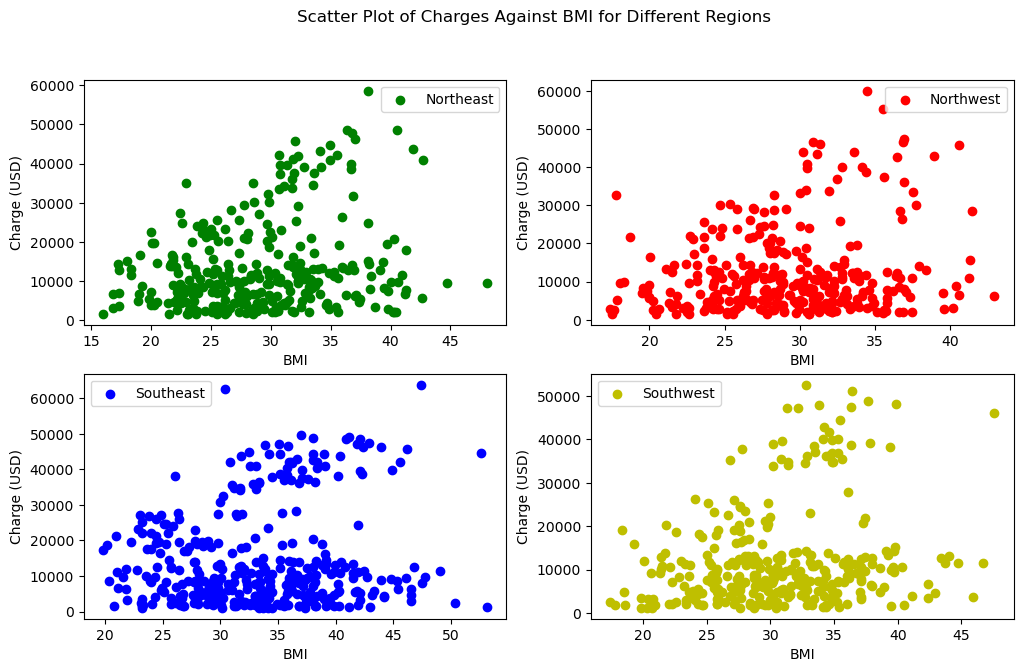

In [99]:
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 7))
ax.scatter(ne[1], ne[2], c='g', marker='o', label = 'Northeast')
ax2.scatter(nw[1], nw[2], c='r', marker='o', label = 'Northwest')
ax3.scatter(se[1], se[2], c='b', marker='o', label = 'Southeast')
ax4.scatter(sw[1], sw[2], c='y', marker='o', label = 'Southwest')
ax.set(xlabel='BMI', ylabel='Charge (USD)')
ax2.set(xlabel='BMI', ylabel='Charge (USD)')
ax3.set(xlabel='BMI', ylabel='Charge (USD)')
ax4.set(xlabel='BMI', ylabel='Charge (USD)')
fig.suptitle('Scatter Plot of Charges Against BMI for Different Regions')
ax.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

I could get every possible plot from matching variables like I have done in the above cell of 4 plots together. Because I could, I will, through a function!

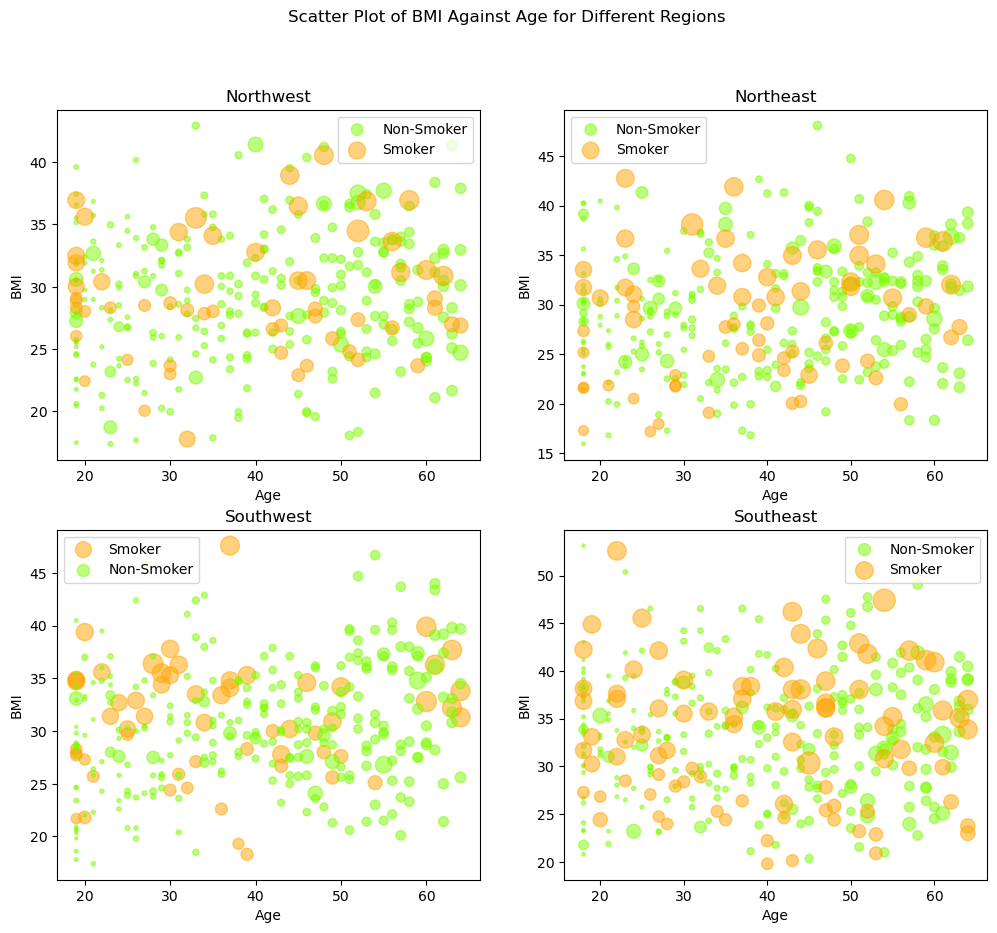

In [100]:
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
plots = [ax, ax2, ax3, ax4]
titles = ['Northwest', 'Northeast', 'Southwest', 'Southeast']
for i in range(len(regions)):
    region = regions[i]
    current_plot = plots[i]
    subgroups = []
    for element in region[5][1]:
        if element not in subgroups:
            subgroups.append(element) # Get a list of labels
    for subgroup in subgroups: # Go through every subcategory - the categories in the legend
        x = []
        y = []
        color = []
        size = []
        for j in range(len(region[5][1])): # Get scatter data for one subgroup at a time
            if region[5][1][j]==subgroup:
                x.append(region[0][j])
                y.append(region[1][j])
                color.append(region[5][0][j])
                size.append(region[2][j])
        for size_index in range(len(size)):
            size[size_index] = size[size_index]/250 # Get a better spread of sizes
        # Plot for this subgroup
        current_plot.scatter(x, y, c=color, s=size, marker='o', label=subgroup, alpha = 0.5)
    # Add some final display information for this subplot, before the next one
    current_plot.set(title = titles[i], xlabel='Age', ylabel='BMI')
    current_plot.legend()
fig.suptitle('Scatter Plot of BMI Against Age for Different Regions')
plt.show()

Size of the markers represents the insurance charge. I now have 5 variables related to each other on the same plot!

 - Region
 - BMI
 - Age
 - Smoking Status
 - Insurance Charge
 
 We can see that smokers tend to have larger circles, so they tend to have higher charges. There tends to be a lot of small green circles on the left, indicating that young non-smokers tend to have low charges. It looks like the Southeast region has the most smokers and it also appears to have the most large circles, indicating that these smokers tend to pay more than in other regions.

We also have more bar charts that we can now interpret.

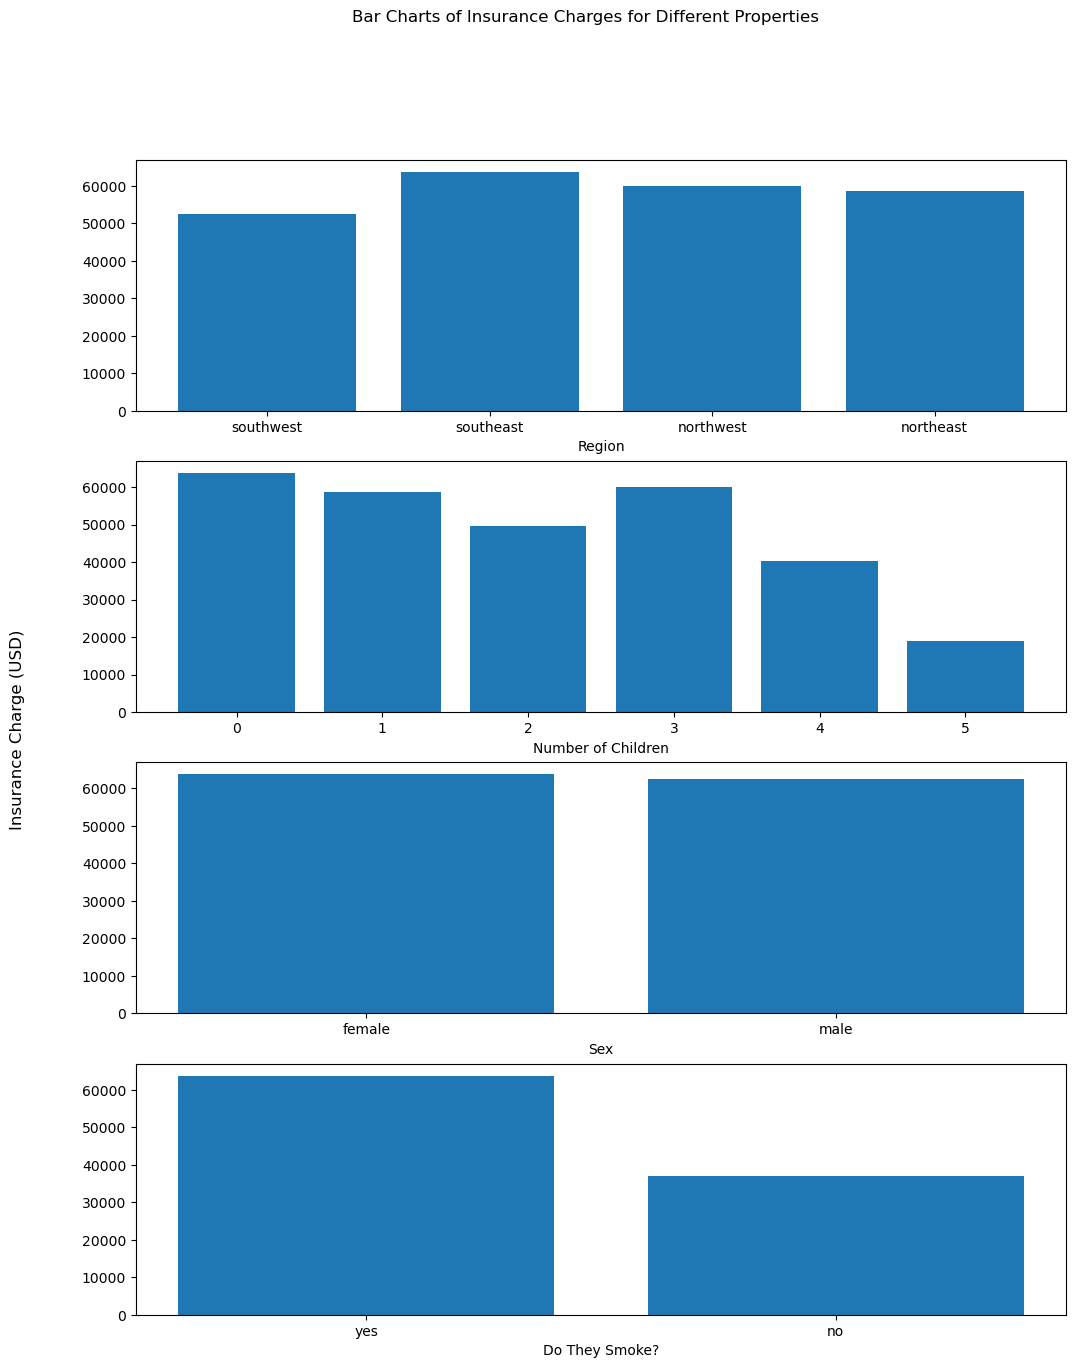

In [101]:
fig, (ax, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 15))
ax.bar(region_list, charges_list)
ax2.bar([float(x) for x in children_list], charges_list) # change to floats to order the x-axis
ax3.bar(sex_list, charges_list)
ax4.bar(smoker_list, charges_list)

ax.set(xlabel='Region')
ax2.set(xlabel='Number of Children')
ax3.set(xlabel='Sex')
ax4.set(xlabel='Do They Smoke?')

fig.supylabel('Insurance Charge (USD)')
fig.suptitle('Bar Charts of Insurance Charges for Different Properties')
plt.show()

I could continue this project, extending the bar charts to incorporate different groups, but I will finish by turning the scatter plot into a function for a user to be able to select the properties displayed.

In [102]:
title_dict = {'age': 'Age', 'bmi': 'BMI', 'charges': 'Insurance Charge (USD)', 'children': 'Number of Children'}

The size of the points represents the Insurance Charge (USD)!


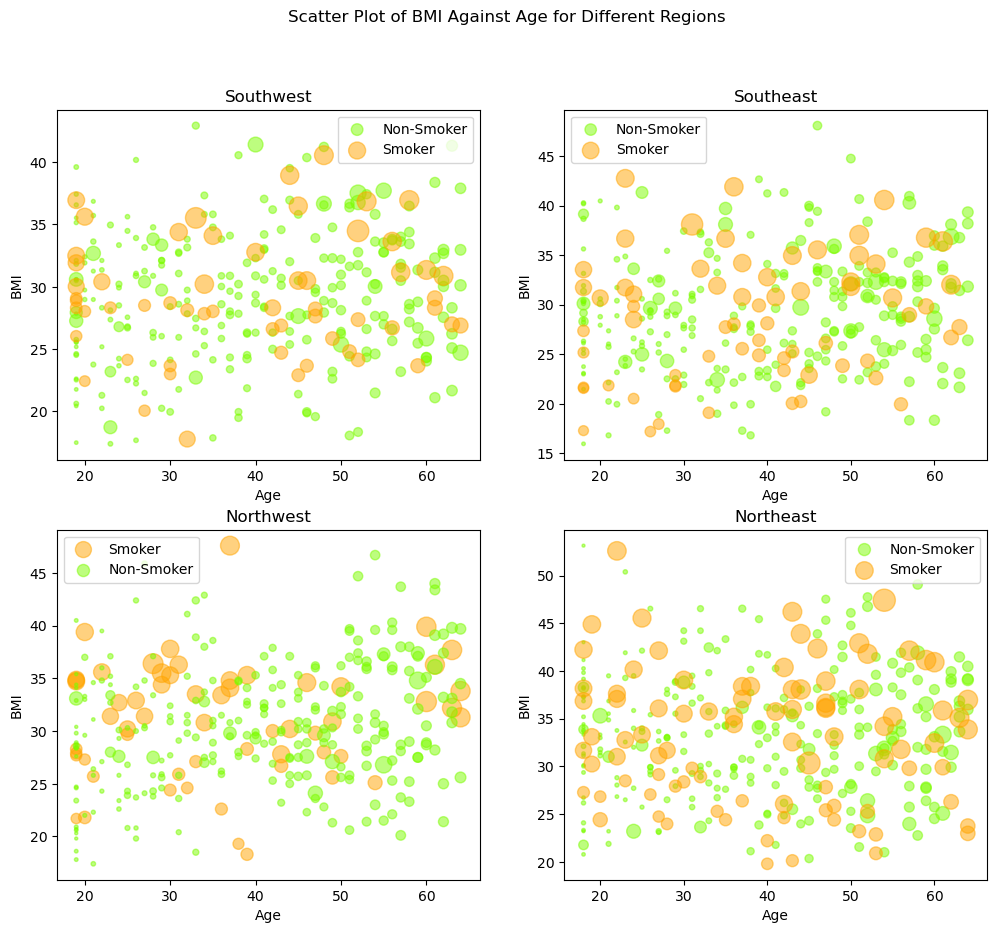

In [112]:
# This is the exact copy of the above plotting method. Edit this to turn it into a function.
def get_mega_plot(split_by, legendary, x_var, y_var, size_var, scale):
    print('The size of the points represents the', title_dict.get(size_var) + '!')
    if split_by=='region':
        groups = regions
        subtitle = 'Regions'
        dictionary = region_dict
    elif split_by=='sex':
        groups = sex
        subtitle = 'Sex'
        dictionary = sex_dict
    elif split_by=='smoker':
        groups = smokers
        subtitle = 'Smoking Statuses'
        dictionary = smokers_dict
    elif split_by=='children': # Could be else, but this allows for future categories to be added
        groups = child
        subtitle = 'Number of Children'
        dictionary = child_dict
    # Get the right shape for the plots
    if len(groups)==2:
        fig, ((ax, ax2)) = plt.subplots(1, 2, figsize=(12, 10))
        plots = [ax, ax2]
    elif len(groups)==4:
        fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
        plots = [ax, ax2, ax3, ax4]
    elif len(groups)==6:
        fig, ((ax, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 10))
        plots = [ax, ax2, ax3, ax4, ax5, ax6]

    # Get the titles for the plots
    titles = []
    for value in data_dict[split_by]:
        if value.title() not in titles:
            titles.append(value.title())
    if split_by=='children':
        for i in range(len(titles)):
            if titles[i]=='0':
                titles[i] = 'People with No Children'
            elif titles[i]=='1':
                titles[i] = 'People with 1 Child'
            else:
                titles[i] = 'People with ' + titles[i] + ' Children'
    # Set the axis titles
    x_title = title_dict[x_var]
    y_title = title_dict[y_var]
    # Get the colour-coordinated legend groups
    lindex = dictionary[legendary]
    # Get the right index values
    if x_var=='children': x_var = 6 # Special case for children as a float
    else: x_var = dictionary[x_var]
    if y_var=='children': y_var = 6
    else: y_var = dictionary[y_var]
    if size_var=='children': size_var = 6
    else: size_var = dictionary[size_var]
    
    for i in range(len(groups)):
        group = groups[i]
        current_plot = plots[i]
        subgroups = []
        for element in group[lindex][1]:
            if element not in subgroups:
                subgroups.append(element) # Get a list of labels
        # Go through every subcategory - the categories in the legend
        for subgroup in subgroups: 
            x = []
            y = []
            color = []
            size = []
            for j in range(len(group[lindex][1])): # Get scatter data for one subgroup at a time
                if group[lindex][1][j]==subgroup:
                    x.append(group[x_var][j])
                    y.append(group[y_var][j])
                    color.append(group[lindex][0][j])
                    size.append(group[size_var][j])
            for size_index in range(len(size)):
                size[size_index] = size[size_index]/scale # Get a better spread of sizes
            # Plot for this subgroup
            current_plot.scatter(x, y, c=color, s=size, marker='o', label=subgroup, alpha = 0.5)
        # Add some final display information for this subplot, before the next one
        current_plot.set(title = titles[i], xlabel=x_title, ylabel=y_title)
        current_plot.legend()
    fig.suptitle('Scatter Plot of {A} Against {B} for Different {C}'.format(A=y_title, B=x_title, C=subtitle))
    plt.show()
    # Save each plot as an image with a unique filename
    fig.savefig(split_by+legendary+str(x_var)+str(y_var)+str(size_var)+str(scale).replace('.', '_')+'.png')

get_mega_plot('region', 'smoker', 'age', 'bmi', 'charges', 250)

I now have a function that saves figures with multiple plots! I have considered having more data in the future within my functions to ensure they work in the future with larger groups of data.

To summarise the final plot, which is produced from calling variables to display, along with a scale for the size of the circles:

The database can be grouped into separate plots for:
 - Region
 - Sex
 - Number of Children
 - Smoking Status
 
 
 The points of the scatter plot relate any two of the following properties:
  - Age
  - BMI
  - Insurance Charges
  - Number of Children


The colours of the points on the scatter plot separate any of the below:
 - Region
 - Sex
 - Number of Children
 - Smoking Status


The size of the points on the scatter plot represent any of the following:
  - Age
  - BMI
  - Insurance Charges
  - Number of Children
  
Finally, the plot is saved as a PNG with a filename unique to the properties used to produce the plot.

# That's everything that I wanted to do!